In [1]:

import numpy as np 
import matplotlib.pyplot as plt
import itertools
from itertools import product
import operator
import cmath as math
  
from functools import reduce 
import sklearn.metrics as metrics

# 1 test Moriarty’s method yourself
After some prying on your part, Moriarty reluctantly discloses that his secret proprietary machine learning
method is to score +1 for each A or T, and -1 for each C or G.
You note that Moriarty showed results for discriminating against random sequences (of uniform base
composition), but the problem is to discriminate against sand mouse sequences.
Implement Moriarty’s secret proprietary machine learning method. Test it on the sequences in pathogen.fa and
sandmouse.fa. Make a plot of your own, showing a histogram and a ROC plot like in Moriarty’s figure, but for
performance in discriminating pathogen from sand mouse sequences, using matplotlib.
What do you conclude? Why are your results different from Moriarty’s?

lets first investigate the begining of the 3 different files

In [2]:
! head pathogen.fa.txt

>pathogen.1
TTTAGATCGCCCATTGGTCTTCCTCAAAAAGCATATACTGTTCAAAAGCTCACAAATGAATCCATTTGTTAATTGTGAGATGATTAATTCCCGTTAACATTATAAGGCAATACCATATGGTATTGCGTTTCCACAATTACTTAAGAAAACAATATAATTTAAATGGTTTTTTCGTAGCTATATTTATATTAAAAAGTTTC
>pathogen.2
AGTGGTGCAATATAGGATGTATTAGATGCATGTTAAAGCATTGTTATTTTGCGGTTTTCAAATAAAAAAGAAACCAATCTCAAAACAGGACAGTATATTTATATCTTAGAATTCCAGCAACTAAAAGATTTTTCCTTATTTAAGTTATGTCTATATCATTTTTGTATGCAACAAATTAAATATAAATTAATGTTTGTTAA
>pathogen.3
CTATGGAAAAAAAAGAATTGGGGATTAGTAGAGTGGAATAAAACAGAATATATAAAATATCACGTCATTTTTATGCCATTCCTACATAATATTTAGTAAGAAAATAGCTAAAATTCAAACGCATTTTTAGAACTAAATTTAGACAAATAATACTGTTTTAAGCAAACAATTTTAGATTTTTAAAAAATGAATGTTTTTGG
>pathogen.4
TTTTTGAAATTTTCCGATTTTATGGAATAATCTTTTAAATTTCCTATCCTGGAACAAACATTTTAAAATGGCATAATAGAAAAACAAACAAGTTTTATAAGACATGTATATTTATATGATACAGGTTAAAAAATATTTTCATATTTTATTAAAATTAATCTTTTATAGTGGCAACTAATTTGAGAATATAAGTGAAAGAG
>pathogen.5
ATTTACGCAAAAATTTAACTTTTTATTATCTCTAGAAAAAGCAATGAATATTATCTTAGAATCGTTTTTATCCATATAAGGAAAATTTGCAAGGAACATGGACGCTATATCAATTCCATAGCAAAATAAAAAAGAA

In [3]:
! head sandmouse.fa.txt

>sandmouse.1
ATCAATTAAAAAAAACATGGATTACTCACTTTAGAAATATACTTAATCATACAGCCTAGTAGTTATATTAAAGATTTTTACAATTATATACTCATATTAAGAGCTTTTTACATTATATCAATATCGGATTTTGAACCCATTTTGTATTTATAAATTAGATTAGACGAGAGTCTTATAGATCTTTTAGTTTCTAGTTATTC
>sandmouse.2
ATATATATTATTCTCTCTCTTGCTGAATTAACCCGATTATATAATTTCGAGTAGGTAATAATAATAGAGATCTATTATCATTCGCATTTTGATTTTCATTCAGTTTACTTTTTAAAAATACTGTTGCACAATGATTATTACTTTCTGAATAGATTTTAATATATTGTTCTATGACAGTAAAATCTATACATTTGTTTATA
>sandmouse.3
TATTGAAGATGGTATTAAATCAACTTATTTCATTAAAATAATTTTACTATAATCAGTAATAAACAACATATAGAATCGTATGATATAGCTTTGTAAGTAGACGAAAACTAGAGTATACACTTTAAATATGATGGGGTATAAACAAAAACTATTATTGTAAAAATTTTTATAGTTATTATTAAAGCAAAATCACTGAGAAA
>sandmouse.4
CAAATAAATTATTTGTGATTTTAATAAATTTATGTTTTCAATAAATTTCACCACCTTTAGATAACTATTCATTGATATATGGTTATGTGATGTAAAACGTCTGGTAATGAATACATTTTAACCATATATTATATTTATCTAAGTTGATAAATTCTATATTTGTAAAATGTGTAATATAAAAAGAAATTATTTAAATTAAG
>sandmouse.5
TAAATTACTAGTAATAATATCTATAGAGCTAAATTAACACTAGGTATATAAGAAACAATACATTTTCATTATTCAAATTCGATATAGTATCTTGTATTAGTACGATACCTATACAAAGTGTAATATTTATA

In [4]:
! head moriarty-neg.fa.txt

>neg.1
TAAATACAAGGATGCAACAACGACAGTAGAACGTTAATCCCATGCAGTGACGAACTATCCGGCCCCAGGACTGTCCACGCATACGACGATGTACTGGTCCGCCGTTGCCATAATGTGACACAGTTGTCAATTGTAAGTATGTCTGCGGCATTCCGACGAGGTCAATAGTGCTCTGATTTCCTGTTGAGGAGTTAATAAAA
>neg.2
CCGGAAGCCCATCATCTGGTCTCTCTGACACGCACCGAATTAACTGGAATAGATGGGGTATAGCGCAACGCTTATCGGCGTGTTGCATAGGGATTACGGGCTCGAGGAGCGTGACGTCTGTGAATCACTGGGACGCAATTACGGGTCGACATTCGTACCATCCGACTGGGATTACTCAGGCCTAGATCACACATTAGTTT
>neg.3
TGCCCCAGTTTGCCGCGTTCGATTGGAAGGGTATAGGCTTGTGCGACGATTTCCGGCCCTGCCATTTGACCGCAGACATCGATAGATTACCGAATGAAGGGTTTGATAGCTTCCCTGCCATTCATCATTCACCCTGTGCCCTACCTGCGGCGGACGCGGTTCGGAATCGCAACCTAGTCTACTTGCGTTGATGAGACCTT
>neg.4
TCGATGCAAAGTATGCTACCAGTGAGAGAAGCGGCGGCAAAGCAAGCTGTGGCCTAACGTAGCCAAAGTTCTATTCGACAATCTCATAACCGGGCTCAGCTTTGCACGCCGCGTCAGTAGATCTCACAACAGAAATCACTAGGTGTCGGAGAGTCACAATGTGTCGCGGCGTTCTACTACTGTTCTCGGGACGTAATGGT
>neg.5
TGTGATCTTGACGACCGCAAACAAAAAATTAAGCTAATTGACTTTGTGGAAGCCAAAGGGGAAATCTAGGAGCAAGAACGGATAATAAGGAGCGCTCGCGTAAGCCTCTCGATGATCTTGAGGCGAGGACGAACTCGCAAGGTCCAGGAATGCTCAATTAA

In [5]:
# initialize sandmouse&pathogen&random lists
sandmouse_data = []
pathogen_data = []
random_data =[]
# load data from files
with open('pathogen.fa.txt') as pathogen_file:
    for line in pathogen_file:
        if line[0]=='>':continue  #if first element of the line is > -ignore it(because it correspond to a gene name)
        pathogen_data.append(line.strip())
with open('sandmouse.fa.txt') as sandmouse_file:
    for line in sandmouse_file:
        if line[0]=='>':continue 
        sandmouse_data.append(line.strip()) #.strip() to skip the /n at the end of each reads
with open('moriarty-neg.fa.txt') as random_file:
    for line in random_file:
        if line[0]=='>':continue 
        random_data.append(line.strip()) #.strip() to skip the /n at the end of each reads        
 

feel free to uncomment  the chunk bellow - Check point - in the rest of this pset I included different check point - commented chunk - 

In [6]:
  
# print(pathogen_data[0:2])
# print(sandmouse_data[0:2])
# print(random_data[0:2])
 
# print(len(pathogen_data))
# print(len(sandmouse_data))
# print(len(random_data))



for each sequence(in pathogen_data/sandmouse_data & random_data) lets get the scores the way moriaty defined the score - 
I go through all the sequences at each position if the nucleotide is a A or T then I add 1 to count_A_T and add 1 to count_A_T if the nucelotide is a C or G  

then after going through each sequence I update the final score of this sequence - count_A_T-count_C_G  and I append it to the score_array. 

Therefore , score_array is the same size as the number of sequences in each data set

In [7]:
num_seq = len(pathogen_data) #len(sandmouse_data) & len(random_data) are the same 

def get_score(list_of_interest):
    score_array=[]
    for i in list_of_interest :
        count_A_T=0 #reinitialise for each sequence
        count_C_G=0
        for letter in i :
            if letter=='A' : 
                count_A_T=count_A_T+1
            elif letter=='T' : 
                count_A_T=count_A_T+1
            elif letter=='C' :
                count_C_G=count_C_G+1
            elif letter=='G' :
                count_C_G=count_C_G+1
                
        score= count_A_T-count_C_G  #because 1 A or T is +1 and C or G is -1  
        score_array.append(score)
    return (score_array) 


In [8]:
#check
# print(get_score(pathogen_data)[0:10])
# print(get_score(sandmouse_data)[0:10])
# print(get_score(random_data)[0:10])
# print('the len of the score for pathogen data is ',len(get_score(pathogen_data))) 
# print('the len of the score for sandmouse data is ',len(get_score(sandmouse_data)))
# print('the len of the score for random data is ',len(get_score(random_data)))

Now that I obtain a list of score for the pathogen/random and the sandmouse I want to plot histograms to see the distribution of the different data set and see how random and sandmouse overlap (or no) with the pathogen data set

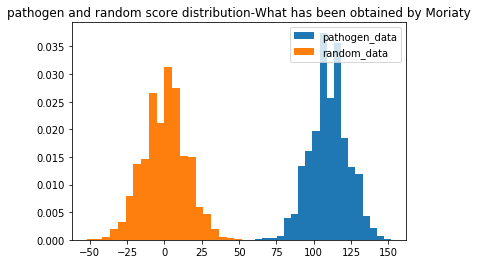

In [9]:
#pathogen and random 
plt.hist(get_score(pathogen_data),bins=20, label='pathogen_data',density=True)
plt.hist(get_score(random_data),bins=20, label='random_data',density=True)
plt.legend(loc='upper right')
plt.title('pathogen and random score distribution-What has been obtained by Moriaty')
plt.show()


This is very close to what moriaty obtained - and the reason those 2 scores distributions are quite clearly separated is that he compared the pathogen data to a random data and not to the sandmouse data
Lets see if the score method he implemted can help us to distinguish between pathogen and sandmouse 

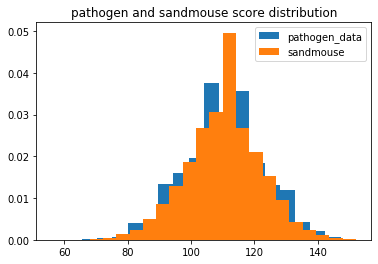

In [10]:

plt.hist(get_score(pathogen_data),bins=20,label='pathogen_data',density=True)
plt.hist(get_score(sandmouse_data),bins=20,label='sandmouse',density=True)
plt.legend(loc='upper right')
plt.title('pathogen and sandmouse score distribution')
plt.show()

In this case, the separation between the 2 data set is not as obvious- 
Lets use a ROC curve to actually investigate how good this score method discriminate between pathogen and sandmouse- 
to obtain the roc plot I have to get the sensitivity and the FPR at different thresholds - 
From the plot we can see that the minimum values for all 3 is above 0 so I will use 0 as the minimum threshold and vary the threshold up to the max value that the scores can take.  

In [11]:
# maximum scores across both pathogene and sandmouse data and random
max_score_sand_pathogen = max(max(get_score(pathogen_data)),max(get_score(sandmouse_data)))
max_score_random_pathogen = max(max(get_score(pathogen_data)),max(get_score(random_data)))
#since max_score_random_pathogen and max_score_sand_pathogen are the same lets only use one for the next steps 
max_score_1= max_score_random_pathogen 

now I will vary the threshold and get a sensitivity and 1-specificity for each of the threshold

- if we are looking at sand mouse - score_set_1:


        - if the score obtained is higher or equal to the threshold then its a TRUE POSITIVE
    
        - if the score obtained is lower to the threshold then its a FALSE NEGATIVE

- if we are looking at the comparaison data ( sandmouse or random )-  score_set_2:
    
    
    -if the score obtain is higher or equal to the threshold then its FALSE POSTIVIE
    
    
    -if the score obtained is lower to the threshold then its a TRUE NEGATIVE

I did a count for each invididual threshold and appended the score to TP/FP/TN/FN
Now that I have an array containing the TP/FP/TN/FN for each threshold I can caluclate the 
- sensitivity 
- 1-specificity 

FOR EACH THRESHOLD 

the function returns - 6 arrays -

sensitivity, FPR,threshold_scores,FP,TP



In [12]:
def get_sensitivities_RPR(score_set_1,score_set_2,max_score,step=1,min_score=0): 
    
    threshold_scores=np.arange(min_score,max_score,step) #making the step smaller will take a smaller time to run so I chose step=1 because the obtained ROC curves are reasonable 
    # # set up 
    TP = []
    FP = []
    TN = []
    FN = []
    for threshold in threshold_scores: #loop over all the threshold we want to test for 
        TP_count=0 #reintialize the counts for each new threshold
        FN_count=0
        FP_count=0
        TN_count=0

        for score in score_set_1: #go through all the scores of pathogene_data
            if score >= threshold :
                TP_count = TP_count +1
            elif score < threshold :
                FN_count=FN_count+1
        for score in score_set_2: #go through all the scores of comparaison(which will later be either sand or random data)
            if score >= threshold :
                FP_count= FP_count+1
            elif score < threshold :
                TN_count = TN_count +1
        TP.append(TP_count)  #for each threshold add the corresponding  TP/FP/TN/FN Count  to the TP    
        FP.append(FP_count)
        TN.append(TN_count)
        FN.append(FN_count)

    TP = np.array(TP)
    FP = np.array(FP)
    TN = np.array(TN)
    FN = np.array(FN)
    sensitivity = (TP/(TP+FN))  #this is an array containing the sensitivity for each one of the threshold  
    FPR = (1-(TN/(TN+FP)))  
    return(sensitivity, FPR,threshold_scores,FP,TP,TN,FN)


lets get the roc plot for the pathogen/sandmouse data - do to do so I run the function get_sensitivities_RPR
the arrays sensitivity_SM,FPR_SM are the used for the ROC curve

In [13]:

(sensitivity_SM,FPR_SM,threshold,FP,TP,TN,FN)=get_sensitivities_RPR(score_set_1=get_score(pathogen_data),score_set_2=get_score(sandmouse_data),max_score=max_score_1) #get output of the function 
#assign output of function to varaibles to be able to plot the graph


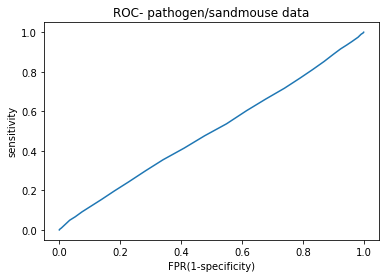

the area under the curve is  0.49827809


In [14]:
#I compare stand and pathogene and not pathogene vs random 
Area_under_curve_SM=metrics.auc(FPR_SM,sensitivity_SM)
plt.plot(FPR_SM,sensitivity_SM)
plt.ylabel('sensitivity')
plt.xlabel('FPR(1-specificity)')
plt.title('ROC- pathogen/sandmouse data')
plt.show()
print('the area under the curve is ',Area_under_curve_SM)


This ROC is showing that the moriaty results are bias 
when we take pathogen and sandmouse data I obtained a ROC that is showing that the model (the score model moriaty used)
is not good as distingushing pathogen from sandmouse 
the reason I can affirm that is that the plot obtained is nearly a line that goes to the origin with a slope of 1.
and the area under the curve is 0.5
A 'ideal' ROC is shown bellow(the one actually used by Moritaty)
But the reason its Bias is that he tried to discriminate betwwen random and pathogen instead of pathogen and sandmouse

In [15]:
(sensitivity_Random,false_positive_rate_Random,threshold,FP,TP,TN,FN)=get_sensitivities_RPR(score_set_1=get_score(pathogen_data),score_set_2=get_score(random_data),max_score=max_score_1)

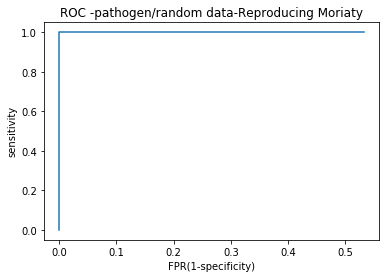

the area under the curve is  0.49827809


In [16]:
Area_under_curve_Random=metrics.auc(FPR_SM,sensitivity_SM)
plt.plot(false_positive_rate_Random,sensitivity_Random)
plt.ylabel('sensitivity')
plt.xlabel('FPR(1-specificity)')
plt.title('ROC -pathogen/random data-Reproducing Moriaty')
plt.show()
print('the area under the curve is ',Area_under_curve_Random)

# 2  make your own method

step0 -split the data in 2

In [17]:
#spliting the data in half and mix 
np.random.seed(3)
np.random.shuffle(pathogen_data)
np.random.shuffle(sandmouse_data)
pathogen_data_training = pathogen_data[:5000]
pathogen_data_testing= pathogen_data[5000:]
sandmouse_data_training = sandmouse_data[:5000]
sandmouse_data_testing= sandmouse_data[5000:]

#check
#pathogen_data_training[0]

 step 1
 - How many distincts 3-mers and 2-mers are possible in this dataset? - we have 4 options(ATCG)
 
    so the number of 2 mers possibles are :4^2 - 16
    
    so the number of 3 mers possibles are :4^3 - 64
        

In [18]:
possible_2kmers=list(product('ATCG', repeat=2))# this is the list of all possible 2kMers that can be form using the 4 nucelotides(ATCG0)
possible_3kmers=list(product('ATCG', repeat=3))# this is the list of all possible 3kMers that can be form using the 4 nucelotides(ATCG0)

In [19]:
#check 
#print(len(possible_2kmers)) #Expect 16
#print(len(possible_3kmers)) #Expect 64

step 2 - for each training data -obtain the frequency(will be used later to approximate the probablities)


so first I create 4 for counts lists

- 2kmers in pathogen- twomer_counts_pathogen
- 2 kmers in sandmouse -twomer_counts_sandmouse

- 3kmer in pathogen - threemer_counts_pathogen 
- 3 kmer in sand mouse -threemer_counts_sandmouse

I then converted the values to frequency(by dividing each element by the sum of the elements in that array)


In [20]:
#initialization
twomer_counts_pathogen = np.zeros(len(possible_2kmers))
twomer_counts_sandmouse = np.zeros(len(possible_2kmers))
threemer_counts_pathogen = np.zeros(len(possible_3kmers))
threemer_counts_sandmouse = np.zeros(len(possible_3kmers))

for sequence in pathogen_data_training: #going through all sequences of the pathogen_data_training
    for i in range(0,(len(sequence)-1)): #i is the index of the nucleotide
        two_kmer=sequence[i],sequence[i+1] 
        i=possible_2kmers.index(two_kmer) # possible_2kmers.index(twokmer) returns the index of the current element(twokmer) in the list possible_2kmers
        twomer_counts_pathogen[i] = twomer_counts_pathogen[i] + 1 #update twomer_counts_pathogen of this corresponding index

    for i in range(0,(len(sequence)-2)): #same principle 3 kmer 
        three_kmer=sequence[i],sequence[i+1],sequence[i+2]
        i=possible_3kmers.index(three_kmer) 
        threemer_counts_pathogen [i] = threemer_counts_pathogen [i] + 1 



for sequence in sandmouse_data_training: #going through all sequences of the sandmouse_data_training and repeating a similar process
    for i in range(0,(len(sequence)-1)):
            two_kmer=sequence[i],sequence[i+1]
            i=possible_2kmers.index(two_kmer) 
            twomer_counts_sandmouse[i] = twomer_counts_sandmouse[i] + 1 
    for i in range(0,(len(sequence)-2)):
        three_kmer=sequence[i],sequence[i+1],sequence[i+2]
        i=possible_3kmers.index(three_kmer) 
        threemer_counts_sandmouse [i] = threemer_counts_sandmouse [i] + 1 
        
#from counts to frequencies        
        

two_frequency_pathogen = [float(i)/sum(twomer_counts_pathogen) for i in twomer_counts_pathogen]
three_frequency_pathogen = [float(i)/sum(threemer_counts_pathogen) for i in threemer_counts_pathogen]
two_frequency_sandmouse= [float(i)/sum(twomer_counts_sandmouse) for i in twomer_counts_sandmouse]
three_frequency_sandmouse = [float(i)/sum(threemer_counts_sandmouse) for i in threemer_counts_sandmouse]





In [21]:
#check
# print(len(two_frequency_pathogen)) #expect 16
# print(len(three_frequency_pathogen))
# print(len(two_frequency_sandmouse))
# print(len(three_frequency_sandmouse))


# print(two_frequency_pathogen[0:10])
# print(three_frequency_pathogen[0:10])
# print(two_frequency_sandmouse[0:10])
# print(three_frequency_sandmouse[0:10])

# print(possible_3kmers)
# print(threemer_counts_pathogen)

creation of 4 dictionary - easier for the next part and keep track what i am doing 
2 for pathogene 2 for sandmouse 
in each of the dictionary
where the key is the kmer and the value is its corresponding frequency(or probability)

-- dict_sm_2 

-- dict_sm_3

-- dict_path_2

-- dict_path_3 

In [22]:
#redifine possible_2kmers and possible_3kmers - easier to access elements in the next steps
possible_2kmers=list(''.join(prod) for prod in (product('ATCG', repeat=2)))
possible_3kmers=list(''.join(prod) for prod in (product('ATCG', repeat=3)))
#redine to access
dict_sm_2 = dict(zip(possible_2kmers, two_frequency_sandmouse))
dict_sm_3 = dict(zip(possible_3kmers, three_frequency_sandmouse))    
dict_path_2 = dict(zip(possible_2kmers, two_frequency_pathogen))
dict_path_3 = dict(zip(possible_3kmers, three_frequency_pathogen))   


In [23]:
#check 
#dict_sm_2

now probablity dictionaries - for example if we want p(G|AA) = P(AAG)/p(AA)
lets first create the conditional probablities for pathogene(same process will be repeated for sandmouse)

In [24]:
# get the conditional probability for the pathogen 
path_probabilities={} #initialize 
path_conditional_prob_keys=[] 
path_conditional_prob_values=[]
size_possible_3kmers=len(dict_path_3.keys())

for i in range(0,size_possible_3kmers): #go through all the keys (All possible 3kmers) - i is the index of the possible 3kmers
    
    key_3_kmer=list(dict_path_3.keys())[i] #key_3_kmer is the current 3kmer having an index i in the dict_path_3 dictionary
    frequency_3_kmer=list(dict_path_3.values())[i] #key_3_kmer is the current 3kmer value(which correspond to the frequency)
    two_first_kmer=key_3_kmer[0:2] #this is the 2 first kmer that compose the 3_kmer(for example if the 3_kmer is AAG then two_first_kmer
    #two_first_kmer is AA) - 
    
    #next step i want to get the corresponding frequency of this 2kmers-two_first_kmer-( to do so i use dict_path_2)
    two_first_kmer_frequency=dict_path_2.get((two_first_kmer))
    
    conditional_prob = frequency_3_kmer/two_first_kmer_frequency #because p(G|AA)=P(AAG)/p(AA)
    path_conditional_prob_keys.append(str(key_3_kmer)+ "|"+str(two_first_kmer)) #append the path_conditional_prob_keys list 
    path_conditional_prob_values.append(conditional_prob) #append the conditional probablity 
    
                                             
path_probabilities= dict(zip(path_conditional_prob_keys, path_conditional_prob_values)) #dictionary of pathogen conditional proablities obtained by zipping the 2 lists

In [25]:
#check
#path_probabilities

In [26]:
# get the conditional probability for the sandmouse - same process as dor pathogen
sm_probabilities={}
sm_conditional_prob_keys=[]
sm_conditional_prob_values=[]
size_possible_3kmers=len(dict_sm_3.keys())
for i in range(0,size_possible_3kmers):
    key_3_kmer=list(dict_sm_3.keys())[i] 
    frequency_3_kmer=list(dict_sm_3.values())[i] 
    
    two_first_kmer=key_3_kmer[0:2] 
    two_first_kmer_frequency=dict_sm_2.get((two_first_kmer))
    conditional_prob = frequency_3_kmer/two_first_kmer_frequency #because p(G|AA)=P(AAG)/p(AA)
    sm_conditional_prob_keys.append(str(key_3_kmer)+ "|"+str(two_first_kmer))
    sm_conditional_prob_values.append(conditional_prob)
                                             
sm_probabilities= dict(zip(sm_conditional_prob_keys, sm_conditional_prob_values))

In [27]:
#check
#sm_probabilities

# Test the model's performance on the testing set

the next chunk(the commented one is just a demo of how I access conditional proablities given a two kmer and a 3kmer)

In [28]:
#get the proba of the initial sequence of the first sequence of the pathogen_data_testing
# test_2k=(pathogen_data_testing[0][0:2])
# print(test_2k)
# test_3k=(pathogen_data_testing[0][0:3])
# print(test_3k)
# print('path_probabilities.get(str(test_3k)+ "|"+str(test_2k)))

now what I want to do is obtain a list of LLM for the pathogene testing set and a list of LLM for the sandmouse testing set 


First for the pathogen what are LLM? 
-what is important to understand is that there will be as much as LLM as sequence that we want to test - here since we splited the data in half the LLM will be 5000 

-now lets only focus on the first sequence 

LLM =  LOG(  P(sequence1 | from pathogen)     /     P(sequence1 | from sandmouse) ) )


Ok but what is P(sequence1)? -- lets use a the i.i.d. sequence model to estimate P(sequence1)

for simplicity say that sequence1 is AACG 
then P(sequence1) given a 2nd order markov process can be expressed as :

p(AA)*P(C|AA)*P(G|AC)

p(AA) is the inital probability - for the numerator i access that using the dictionary dict_path_2(which contain the proabblity of the pathogen 2kmers)

and P(C|AA) and P(G|AC)for the numerator i access that using the dictionary path_probabilities are conditional probablity for pathogen


now for the denimotator I do something similar but instead of 
for p(AA) I use  dict_sm_2
and for P(C|AA) and P(G|AC) I use sm_probabilities.get


ALSO log(A/B) =log(A)-log(B) - so  LLM for sequence 1 is = LOG(  P(sequence1 | from pathogen) )  -P(sequence1 | from sandmouse)

and log(A*B)= log(A)+log(B) - So log(p(AA)*P(C|AA)*P(G|AC)) is the addition of the log of each probability



In [29]:

#def get the LLM for the pathogen testing set 
        
LLM_reccords_pathogen=[] #initialize the array that will store the LLM score for the pathogen
for sequence in pathogen_data_testing : #go through the pathogen dataset
    
    initial_proba_seq_log_path =np.log(dict_path_2.get(sequence[0:2]))  #since its a second order Markov process the initial probablities cant be conditional proabilities -
    #so for the first 2 nucelotide I used dict_path_2.get (which contains the proba for the 2kmers)
    #and then i took the log of it 
    
    proba_data_pathogen=[] #reinitalize 
    initial_proba_seq_log_sm =np.log(dict_sm_2.get(sequence[0:2]))
    proba_data_sandmouse=[] #reinitalize 
    
    for position_index in range(2,len(sequence)-2):
        twokmer=sequence[(position_index-2):position_index]
        treekmer=sequence[(position_index-2):position_index+1]
        
        proba_path=path_probabilities.get(str(treekmer)+ "|"+str(twokmer)) #this is the conditional proba
        proba_sm=sm_probabilities.get(str(treekmer)+ "|"+str(twokmer)) 
        proba_data_pathogen.append(proba_path)
        proba_data_sandmouse.append(proba_sm)

    log_condtional_proba_pathogen=sum(np.log(proba_data_pathogen))#log of each proba
    score_sequence_pathogen_1=(initial_proba_seq_log_path + log_condtional_proba_pathogen) 

    log_condtional_proba_sandmouse=sum(np.log(proba_data_sandmouse))#log of each proba
    score_sequence_sandmouse_1=initial_proba_seq_log_sm + log_condtional_proba_sandmouse#append a score for each sequence

    LLM_1 = score_sequence_pathogen_1-score_sequence_sandmouse_1 
    LLM_reccords_pathogen.append(float(LLM_1))#append a score for each sequence


In [30]:
#np.sort(LLM_reccords_pathogen)

now we go through th sandmouse testing data set and do a similar process

In [31]:
LLM_reccords_sm=[]    
for sequence in sandmouse_data_testing :
    
    initial_proba_seq_log_sm =np.log(dict_sm_2.get(sequence[0:2]))  #dict_sm_2.getcontains the proba for the 2kmers
    proba_data_sandmouse=[] #reinitalize 
    
    initial_proba_seq_log_pathogen =np.log(dict_path_2.get(sequence[0:2]))
    proba_data_pathogen=[] #reinitalize 
    
    for position_index in range(2,len(sequence)-2):
        twokmer=sequence[(position_index-2):position_index]
        treekmer=sequence[(position_index-2):position_index+1]
        
        proba_sm=sm_probabilities.get(str(treekmer)+ "|"+str(twokmer))
        proba_data_sandmouse.append(proba_sm)
        
        proba_path=path_probabilities.get(str(treekmer)+ "|"+str(twokmer)) #this is the conditional proba
        proba_data_pathogen.append(proba_path)
        
    log_condtional_proba_pathogen=sum(np.log(proba_data_pathogen))#sum of the log of each proba
    score_sequence_pathogen_2=(initial_proba_seq_log_path + log_condtional_proba_pathogen) 

    log_condtional_proba_sandmouse=sum(np.log(proba_data_sandmouse))#log of each proba
    score_sequence_sandmouse_2=initial_proba_seq_log_sm + log_condtional_proba_sandmouse#append a score for each sequence

    LLM_2 = score_sequence_pathogen_2 - score_sequence_sandmouse_2
    LLM_reccords_sm.append(float(LLM_2))#append a score for each sequence
        

In [32]:
#check
# print(len(LLM_reccords_pathogen))
# print(len(LLM_reccords_sm))

same process as part 1 of the pset -alpha=0.5 is used to be able to better vizualize the overlap 

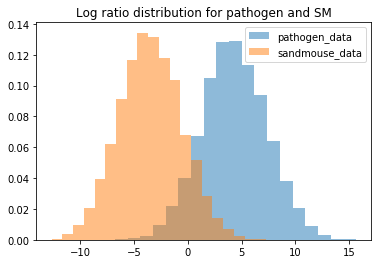

In [33]:
plt.hist(LLM_reccords_pathogen,bins=20,alpha=0.5,label='pathogen_data',density=True)
plt.hist(LLM_reccords_sm,bins=20,alpha=0.5, label='sandmouse_data',density=True)
plt.legend(loc='upper right')
plt.title('Log ratio distribution for pathogen and SM')
plt.show()

In [34]:
max_score_Markov =max(max(LLM_reccords_pathogen),max(LLM_reccords_sm))
min_score_Markov =min(min(LLM_reccords_pathogen),min(LLM_reccords_sm))

if the next step is taking too long to run - reduce the parameter step (explaining why bellow)

In [35]:
sensitivity_Markov,false_positive_rate_Markov,thresholds,FP_Markov,TP_Markov,TN_Markov,FN_Markov=get_sensitivities_RPR(score_set_1=LLM_reccords_pathogen,
                                                                                                            score_set_2=LLM_reccords_sm,
                                                                                                            min_score=min_score_Markov,
                                                                                                            max_score=max_score_Markov,
                                                                                                            step=0.01)
                                                                                    


The Area_under_curve is , 0.9689431199999999


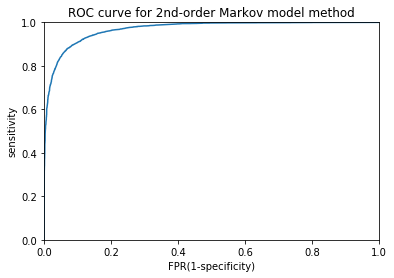

In [36]:
Area_under_curve_Markov=metrics.auc(false_positive_rate_Markov,sensitivity_Markov)
plt.plot(false_positive_rate_Markov,sensitivity_Markov)
plt.ylabel('sensitivity')
plt.xlabel('FPR(1-specificity)')
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('ROC curve for 2nd-order Markov model method')
print("The Area_under_curve is ,",Area_under_curve_Markov)

For this ROC curve - the area under the curve is 0.96
It SEEMS like the i.i.d. sequence model and 2nd order markov model is way better at discriminating the 2 data set compared to the Method moriaty used (where the area under the curve was approximately 0.5) 

# 3 -how good is your method?

I want to achieve 90% sensitivity - first lets "crop the graph" 

(0, 1)

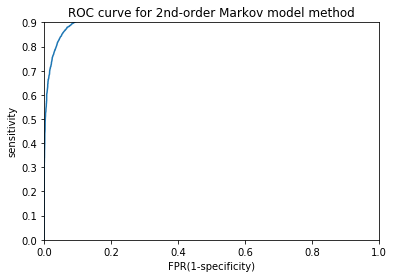

In [37]:
plt.title('ROC curve for 2nd-order Markov model method')
plt.plot(false_positive_rate_Markov,sensitivity_Markov)
plt.ylabel('sensitivity')
plt.xlabel('FPR(1-specificity)')
plt.ylim(0, 0.9)
plt.xlim(0,1)


To which  threshold those the 90% sensitivity correspond? 
Do to find this information first have to find what is the index of the senstivity 0.9(or the closest one possible) in the sensity_markov array(the one returned by the function)

please note that the smallest the step is in the function get_sensitivities_RPR - the closer to 0.9 the senstivity returned by the function find_nearest_sensitivity will be.
I chose a step=0.01 (and therfore obtaining a sensitivity very close to 0.9) 
but I left this parameter variable in my function - so please feel free to reduce the step if its taking too long to run but it shouldnt  

In [38]:
def find_nearest_sensitivity(array=sensitivity_Markov, value=0.9):
    array = np.asarray(array)
    index = (np.abs(array - value)).argmin()
    return array[index],index



using the index of the nearest 90% sensibility i can have acces to the corresponding FDR and threshold 

In [39]:
(value_of_sensitivity,index_of_90sensitivity)=find_nearest_sensitivity(array=sensitivity_Markov, value=0.9)
print('sensitivity',value_of_sensitivity)
false_positive_rate_90sensitivity=false_positive_rate_Markov[index_of_90sensitivity]
print('The corresponding FPR is',false_positive_rate_90sensitivity)
threshold_90sensitivity=thresholds[index_of_90sensitivity]
print('The corresponding threshold',threshold_90sensitivity)

sensitivity 0.9002
The corresponding FPR is 0.09060000000000001
The corresponding threshold 0.4915768750482137


Up to this point we assumed a uniform prior,which is not the case - the probablity of the hypothesis -mouse is more likely then the hypothesis pathogen
(99%mouse vs 1% pathogen)-

In [40]:
#FDR =(FP)/((TP) + (FP)) - but there is 99%mouse , 1% pathogen 
FDR_Markov = (FP_Markov* .99)/((TP_Markov * .01) + (FP_Markov * .99))
print('the false discovery rate is ',FDR_Markov[index_of_90sensitivity])

the false discovery rate is  0.9087906298127584


# not in the pset - just further exploration

The FDR obtained above is very high - what if we want to reduce it - what will be the corresponding sensitivity- 

In [41]:
#this is the same function i just changed the name for clarification 
#how can we acheive a FDR of 10 % 
def find_nearest_FDR(array=FDR_Markov, value=0.1):
    array = np.asarray(array)
    index = (np.abs(array - value)).argmin()
    return array[index],index

In [42]:
(value_of_FDR,index_of_FDR50)=find_nearest_sensitivity(array=FDR_Markov,  value=0.5)
print('FDR',value_of_FDR)
sensitivity_FDR50 = (TP_Markov[index_of_FDR50]/(TP_Markov[index_of_FDR50]+FN_Markov[index_of_FDR50]))
print('the corresponding sensitivity ',sensitivity_FDR50)
#false_positive_rate_FDR50=false_positive_rate_Markov[index_of_FDR50]
#print('The corresponding FPR is',false_positive_rate_90sensitivity)


FDR 0.5003743916136278
the corresponding sensitivity  0.5338


In [43]:
(value_of_FDR,index_of_FDR10)=find_nearest_sensitivity(array=FDR_Markov,  value=0.1)
print('FDR',value_of_FDR)
sensitivity_FDR10 = (TP_Markov[index_of_FDR10]/(TP_Markov[index_of_FDR10]+FN_Markov[index_of_FDR10]))
print('the corresponding sensitivity ',sensitivity_FDR10)
#false_positive_rate_FDR10=false_positive_rate_Markov[index_of_FDR10]
#print('The corresponding FPR is',false_positive_rate_FDR10)

FDR 0.09989909182643794
the corresponding sensitivity  0.1784


Text(0.5, 1.0, 'FDR vs Sensitivity')

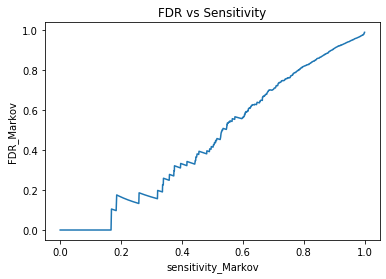

In [44]:
sensitivity_Markov=(TP_Markov/(TP_Markov+FN_Markov))
#print(len(FDR_Markov))
#print(len(sensitivity_Markov))
plt.plot(sensitivity_Markov,FDR_Markov)
plt.xlabel('sensitivity_Markov')
plt.ylabel('FDR_Markov')
plt.title('FDR vs Sensitivity')
#the goal is to have a maximum sensitivity and a minim fdr - at which point in the graph this happens? 

Now lets create a new testing data with the corresponding probaility( represented in terms of size of the testing sample)

In [45]:
#spliting the data in another way that is more representative of the population 
np.random.seed(3)
np.random.shuffle(pathogen_data)
np.random.shuffle(sandmouse_data)
#pathogen_data_training_sample = pathogen_data[:]
pathogen_data_testing_sample= pathogen_data[-20:] #last 20elements of the list 
#sandmouse_data_training = sandmouse_data[:5000]
sandmouse_data_testing_sample= sandmouse_data[-1980:] #last 1980 elements of the list 

In [46]:
#def get the LLM for the pathogen testing set 
        
LLM_reccords_pathogen_sample=[] #initialize the array that will store the LLM score for the pathogen
for sequence in pathogen_data_testing_sample : #go through the pathogen dataset
    
    initial_proba_seq_log_path =np.log(dict_path_2.get(sequence[0:2]))  #since its a second order Markov process the initial probablities cant be conditional proabilities -
    #so for the first 2 nucelotide I used dict_path_2.get (which contains the proba for the 2kmers)
    #and then i took the log of it 
    
    proba_data_pathogen=[] #reinitalize 
    initial_proba_seq_log_sm =np.log(dict_sm_2.get(sequence[0:2]))
    proba_data_sandmouse=[] #reinitalize 
    
    for position_index in range(2,len(sequence)-2):
        twokmer=sequence[(position_index-2):position_index]
        treekmer=sequence[(position_index-2):position_index+1]
        
        proba_path=path_probabilities.get(str(treekmer)+ "|"+str(twokmer)) #this is the conditional proba
        proba_sm=sm_probabilities.get(str(treekmer)+ "|"+str(twokmer)) 
        proba_data_pathogen.append(proba_path)
        proba_data_sandmouse.append(proba_sm)

    log_condtional_proba_pathogen=sum(np.log(proba_data_pathogen))#log of each proba
    score_sequence_pathogen_1=(initial_proba_seq_log_path + log_condtional_proba_pathogen) 

    log_condtional_proba_sandmouse=sum(np.log(proba_data_sandmouse))#log of each proba
    score_sequence_sandmouse_1=initial_proba_seq_log_sm + log_condtional_proba_sandmouse#append a score for each sequence

    LLM_1 = score_sequence_pathogen_1-score_sequence_sandmouse_1 
    LLM_reccords_pathogen_sample.append(float(LLM_1))#append a score for each sequence



In [47]:
LLM_reccords_sm_sample=[]    
for sequence in sandmouse_data_testing_sample :
    
    initial_proba_seq_log_sm =np.log(dict_sm_2.get(sequence[0:2]))  #dict_sm_2.getcontains the proba for the 2kmers
    proba_data_sandmouse=[] #reinitalize 
    
    initial_proba_seq_log_pathogen =np.log(dict_path_2.get(sequence[0:2]))
    proba_data_pathogen=[] #reinitalize 
    
    for position_index in range(2,len(sequence)-2):
        twokmer=sequence[(position_index-2):position_index]
        treekmer=sequence[(position_index-2):position_index+1]
        
        proba_sm=sm_probabilities.get(str(treekmer)+ "|"+str(twokmer))
        proba_data_sandmouse.append(proba_sm)
        
        proba_path=path_probabilities.get(str(treekmer)+ "|"+str(twokmer)) #this is the conditional proba
        proba_data_pathogen.append(proba_path)
        
    log_condtional_proba_pathogen=sum(np.log(proba_data_pathogen))#sum of the log of each proba
    score_sequence_pathogen_2=(initial_proba_seq_log_path + log_condtional_proba_pathogen) 

    log_condtional_proba_sandmouse=sum(np.log(proba_data_sandmouse))#log of each proba
    score_sequence_sandmouse_2=initial_proba_seq_log_sm + log_condtional_proba_sandmouse#append a score for each sequence

    LLM_2 = score_sequence_pathogen_2 - score_sequence_sandmouse_2
    LLM_reccords_sm_sample.append(float(LLM_2))#append a score for each sequence

In [48]:
max_score_Markov_sample =max(max(LLM_reccords_pathogen_sample),max(LLM_reccords_sm_sample))
min_score_Markov_sample =min(min(LLM_reccords_pathogen_sample),min(LLM_reccords_sm_sample))

In [49]:
sensitivity_Markov_sample,false_positive_rate_Markov_sample,thresholds_sample,FP_Markov_sample,TP_Markov_sample,TN_Markov_sample,FN_Markov_sample=get_sensitivities_RPR(score_set_1=LLM_reccords_pathogen_sample,
                                                                                                            score_set_2=LLM_reccords_sm_sample,
                                                                                                            min_score=min_score_Markov_sample,
                                                                                                            max_score=max_score_Markov_sample,
                                                                                                            step=0.01)
                                                                                    



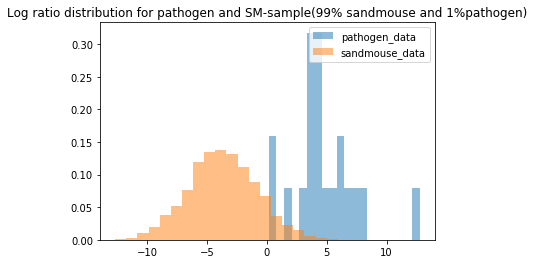

In [50]:
plt.hist(LLM_reccords_pathogen_sample,bins=20,alpha=0.5,label='pathogen_data',density=True)
plt.hist(LLM_reccords_sm_sample,bins=20,alpha=0.5, label='sandmouse_data',density=True)
plt.legend(loc='upper right')
plt.title('Log ratio distribution for pathogen and SM-sample(99% sandmouse and 1%pathogen)')
plt.show()

This could better be even better if i selected larger population size(with same ratio )

The Area_under_curve is , 0.9874368686868686


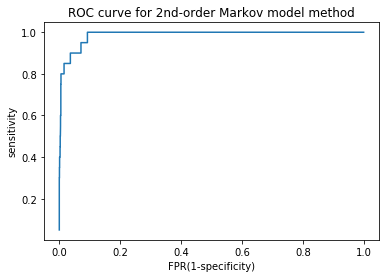

In [51]:
Area_under_curve_Markov_sample=metrics.auc(false_positive_rate_Markov_sample,sensitivity_Markov_sample)
plt.plot(false_positive_rate_Markov_sample,sensitivity_Markov_sample)
plt.ylabel('sensitivity')
plt.xlabel('FPR(1-specificity)')
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.title('ROC curve for 2nd-order Markov model method')
print("The Area_under_curve is ,",Area_under_curve_Markov_sample)

In [52]:
(value_of_sensitivity_sample,index_of_90sensitivity_sample)=find_nearest_sensitivity(array=sensitivity_Markov_sample, value=0.9)
print('sensitivity',value_of_sensitivity_sample)
false_positive_rate_90sensitivity_sample=false_positive_rate_Markov_sample[index_of_90sensitivity_sample]
print('The corresponding FPR is',false_positive_rate_90sensitivity_sample)
threshold_90sensitivity_sample=thresholds_sample[index_of_90sensitivity_sample]
print('The corresponding threshold',threshold_90sensitivity_sample)

sensitivity 0.9
The corresponding FPR is 0.07121212121212117
The corresponding threshold 0.5198353016016917


--
This means that even if we have a high sensitivity (90%) we still have a very high discovery rate - 
what I want to do next is to try to get at which -- we can have a FDR of 5%

 Lets adujst the log-odds scores accordingly to prior ratio - 
(for simplicity x is the sequence)
what we have so far is 
LLR = log(P(x∣pathogen)/P(x∣sandmouse))
But we know that p(pathogen)=0.01 and p(sandmouse)=0.99 

so we have to adjust the LLR to obtain the Log posterior ratio


LPR=log( P(x∣pathogen)*P(pathogen)  /   P(x∣sandmouse)*P(sandmouse) )

In [53]:
proba_pathogen=0.01
proba_sandmouse=0.99
#def get the LLM for the pathogen testing set 
       
LPR_reccords_pathogen_corrected=[] 
for sequence in pathogen_data_testing : 
    
    initial_proba_seq_log_path =np.log(dict_path_2.get(sequence[0:2]))  
    
    proba_data_pathogen=[] #reinitalize 
    initial_proba_seq_log_sm =np.log(dict_sm_2.get(sequence[0:2]))
    proba_data_sandmouse=[] #reinitalize 
    
    for position_index in range(2,len(sequence)-2):
        twokmer=sequence[(position_index-2):position_index]
        treekmer=sequence[(position_index-2):position_index+1]
        
        proba_path=path_probabilities.get(str(treekmer)+ "|"+str(twokmer)) #this is the conditional proba
        proba_sm=sm_probabilities.get(str(treekmer)+ "|"+str(twokmer)) 
        proba_data_pathogen.append(proba_path)
        proba_data_sandmouse.append(proba_sm)

    log_condtional_proba_pathogen=sum(np.log(proba_data_pathogen))#log of each proba
    score_sequence_pathogen_3=(initial_proba_seq_log_path + log_condtional_proba_pathogen) +np.log(proba_pathogen)

    log_condtional_proba_sandmouse=sum(np.log(proba_data_sandmouse))#log of each proba
    score_sequence_sandmouse_3=initial_proba_seq_log_sm + log_condtional_proba_sandmouse +np.log(proba_sandmouse)
    #append a score for each sequence

    LPR_3 = score_sequence_pathogen_3-score_sequence_sandmouse_3 
    LPR_reccords_pathogen_corrected.append(float(LPR_3))#append a score for each sequence



In [54]:
#LPR_reccords_pathogen_corrected

In [55]:
LPR_reccords_sm_corrected=[]    
for sequence in sandmouse_data_testing :
    
    initial_proba_seq_log_sm =np.log(dict_sm_2.get(sequence[0:2]))  #dict_sm_2.getcontains the proba for the 2kmers
    proba_data_sandmouse=[] #reinitalize 
    
    initial_proba_seq_log_pathogen =np.log(dict_path_2.get(sequence[0:2]))
    proba_data_pathogen=[] #reinitalize 
    
    for position_index in range(2,len(sequence)-2):
        twokmer=sequence[(position_index-2):position_index]
        treekmer=sequence[(position_index-2):position_index+1]
        
        proba_sm=sm_probabilities.get(str(treekmer)+ "|"+str(twokmer))
        proba_data_sandmouse.append(proba_sm)
        
        proba_path=path_probabilities.get(str(treekmer)+ "|"+str(twokmer)) #this is the conditional proba
        proba_data_pathogen.append(proba_path)
        
    log_condtional_proba_pathogen=sum(np.log(proba_data_pathogen))#sum of the log of each proba
    score_sequence_pathogen_4=(initial_proba_seq_log_path + log_condtional_proba_pathogen)+np.log(proba_pathogen)

    log_condtional_proba_sandmouse=sum(np.log(proba_data_sandmouse))#log of each proba
    score_sequence_sandmouse_4=initial_proba_seq_log_sm + log_condtional_proba_sandmouse+np.log(proba_sandmouse)
    #append a score for each sequence

    LPR_4 = score_sequence_pathogen_4 - score_sequence_sandmouse_4
    LPR_reccords_sm_corrected.append(float(LPR_4))#append a score for each sequence

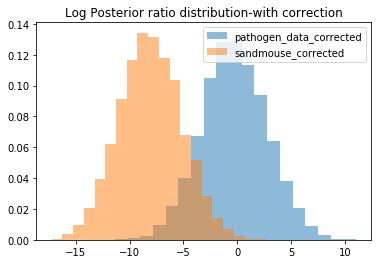

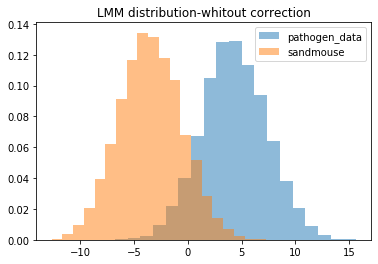

In [56]:
plt.hist(LPR_reccords_pathogen_corrected,alpha=0.5,bins=20,label='pathogen_data_corrected',density=True)
plt.hist(LPR_reccords_sm_corrected,alpha=0.5,bins=20,label='sandmouse_corrected',density=True)
plt.legend(loc='upper right')
plt.title('Log Posterior ratio distribution-with correction')
plt.show()

plt.hist(LLM_reccords_pathogen,alpha=0.5,bins=20,label='pathogen_data',density=True)
plt.hist(LLM_reccords_sm,alpha=0.5,bins=20,label='sandmouse',density=True)
plt.legend(loc='upper right')
plt.title('LMM distribution-whitout correction')
plt.show()

doesnt make the model better because only multiplying by a constant - but the actual scores changed

In [57]:
#np.mean(LLM_reccords_pathogen_corrected)

In [58]:
#np.mean(LLM_reccords_pathogen)

In [59]:
max_score_Markov_corrected=max(max(LPR_reccords_pathogen_corrected),max(LPR_reccords_sm_corrected))
min_score_Markov_corrected =min(min(LPR_reccords_pathogen_corrected),min(LPR_reccords_sm_corrected))

In [60]:
(sensitivity_Markov_corrected,
false_positive_rate_Markov_corrected,
thresholds_corrected,FP_corrected,
TP_corrected,
TN_corrected,
FN_corrected,)=get_sensitivities_RPR(score_set_1=LPR_reccords_pathogen_corrected,
                        score_set_2=LPR_reccords_sm_corrected,
                       min_score=min_score_Markov_corrected,
                       max_score=max_score_Markov_corrected,
                       step=0.01)
                                                                                        

The Area_under_curve is , 0.9689431199999999


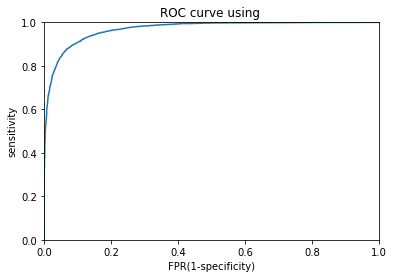

In [61]:
Area_under_curve_Markov_corrected=metrics.auc(false_positive_rate_Markov,sensitivity_Markov)
plt.plot(false_positive_rate_Markov_corrected,sensitivity_Markov_corrected)
plt.ylabel('sensitivity')
plt.xlabel('FPR(1-specificity)')
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('ROC curve using ')
print("The Area_under_curve is ,",Area_under_curve_Markov_corrected)

In [62]:
(value_of_sensitivity_corrected,index_of_90sensitivity_corrected)=find_nearest_sensitivity(array=sensitivity_Markov_corrected, value=0.9)
print('sensitivity',value_of_sensitivity_corrected)
false_positive_rate_90sensitivity_corrected=false_positive_rate_Markov[index_of_90sensitivity_corrected]
print('FPR',false_positive_rate_90sensitivity_corrected)
threshold_90sensitivity_corrected=thresholds[index_of_90sensitivity_corrected]
print('threshold',threshold_90sensitivity_corrected)

sensitivity 0.9002
FPR 0.09060000000000001
threshold 0.4915768750482137
